In [1]:
import keras
from keras.datasets import mnist
import numpy as np

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


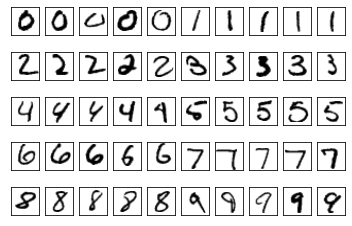

In [2]:
import matplotlib.pyplot as plt

dict = {}
for n in range(x_test.shape[0]):
    if y_test[n] in dict:
        if dict[y_test[n]].shape[0] > 99:
            continue
        dict[y_test[n]] = np.concatenate((dict[y_test[n]],x_test[n][np.newaxis,:]),0)
    else:
        dict[y_test[n]] = x_test[n][np.newaxis,:]

all_image = dict[0]
for n in range(1,10):
    all_image = np.concatenate((all_image,dict[n]),0) #(2800, 280)

def showimg(x_test):
    amount= 50
    lines = 5
    columns = 10
    number = np.zeros(amount)

    for i in range(amount):
        number[i] = y_test[i]

    fig = plt.figure()

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x_test[i,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])

    plt.show()

showimg(all_image[::20])

reduce to 784 dimesions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


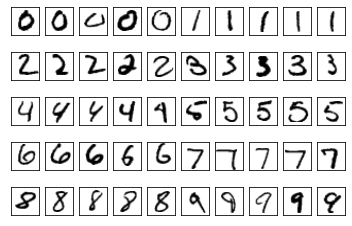

reduce to 500 dimesions


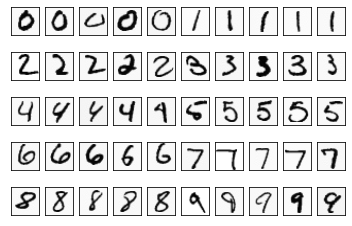

reduce to 300 dimesions


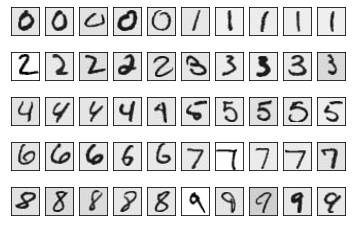

reduce to 100 dimesions


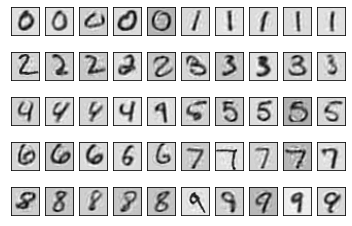

reduce to 50 dimesions


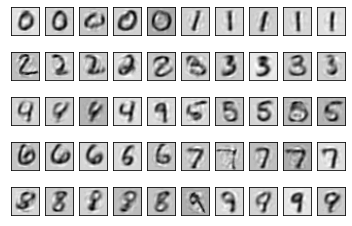

reduce to 30 dimesions


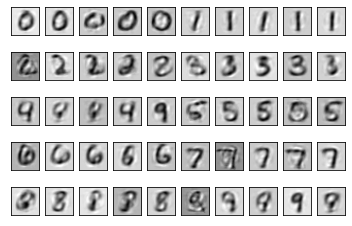

In [3]:
dimensions = [784, 500, 300, 100, 50, 30]
for d in dimensions:
    flat_x = all_image.reshape(1000,784).T
    flat_x_mean = np.mean(flat_x, axis=1,keepdims=True)
    flat_x_std = np.std(flat_x, axis=1,keepdims=True,ddof=1)
    flat_x_std[flat_x_std == 0] = 1e-10
    flat_x_normalized = ((flat_x - flat_x_mean)/flat_x_std).T
  
    x_covariance = np.dot(flat_x_normalized.T,flat_x_normalized) 
    eig_value, eig_vector = np.linalg.eig(x_covariance)

    eigen_index = np.argsort(-eig_value)
    eigen_index = eigen_index[:d]
    eig_vector = eig_vector[:,eigen_index]

    # Encode
    xvector = np.dot(flat_x_normalized , eig_vector) 
    
    # Decode
    img_pca = np.dot(xvector , eig_vector.T)
    img_pca = img_pca*flat_x_std.T + flat_x_mean.T
    img_pca = img_pca.reshape(1000,28,28)


    print(f'reduce to {d} dimesions') 
    showimg(np.float32(img_pca).reshape(1000,28,28)[::20])